# O problema

Imagine agora que você foi contratado(a) como Expert em Data Analytics por um grande hospital para entender como foi o comportamento da população na época da pandemia da COVID-19 e quais indicadores seriam importantes para o planejamento, caso haja um novo surto da doença.

Apesar de ser contratado(a) agora, a sua área observou que a utilização do estudo do PNAD-COVID 19 do IBGE seria uma ótima base para termos boas respostas ao problema proposto, pois são dados confiáveis. Porém, não será necessário utilizar todas as perguntas realizadas na pesquisa para enxergar todas as oportunidades ali postas.

É sempre bom ressaltar que há dados triviais que precisam estar no projeto, pois auxiliam muito na análise dos dados:

- Características clínicas dos sintomas;
- Características da população;
- Características econômicas da sociedade.

O Head de Dados pediu para que você entrasse na base de dados do PNAD-COVID-19 do IBGE e organizasse esta base para análise, utilizando Banco de Dados em Nuvem e trazendo as seguintes características:

a. Utilização de no máximo 20 questionamentos realizados na pesquisa;
b. Utilizar 3 meses para construção da solução;
c. Caracterização dos sintomas clínicos da população;
d. Comportamento da população na época da COVID-19;
e. Características econômicas da sociedade.

Seu objetivo será trazer uma breve análise dessas informações, como foi a organização do banco, as perguntas selecionadas para a resposta do problema e quais seriam as principais ações que o hospital deverá tomar em caso de um novo surto de COVID-19.

> **Dica:** Leiam com atenção a base de dados e toda a documentação que o site do PNAD – COVID-19 traz, principalmente os dicionários, que ajudam e muito no entendimento da Base de Dados.

> **Dica 2:** Utilizem o que já foi ensinado e consolidado nas outras fases para apresentar a resolução do projeto.

Lembre-se de que você poderá apresentar o desenvolvimento do seu projeto durante as lives com docentes. Essa é uma boa oportunidade para discutir sobre as dificuldades encontradas e pegar dicas valiosas com especialistas e colegas de turma.

**Não se esqueça que isso é um entregável obrigatório!** Se atente para o prazo de entrega até o final da fase.

**Vamos pra cima!**


## GRUPO

**Grupo 57**

### INTEGRANTES DO GRUPO 57

- **Thiago dos Santos Oliveira**  
  oliveira.thiago345@hotmail.com

- **Felipe Santos Rocha**  
  sr1179281008@live.com

- **Tiago Silva Rodrigues**  
  ti_ago_silva@hotmail.com

- **Bianca Vasconcelos Silva**  
  biavasco.md@gmail.com

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [37]:
# Carrega o arquivo com os dados do PNAD COVID
df = pd.read_csv('definitivo2.csv', sep=",")

C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\125484415.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('definitivo2.csv', sep=",")


In [38]:
# Verifica a quantidade de valores nulos em cada coluna do DataFrame
df.isnull().sum()

uf                           0
ano                          0
mes                          0
semana                       0
ano_nascimento               0
sexo                         0
cor_raca                     0
tipo_area                    0
escolaridade                 0
teve_sintomas_covid          0
foi_posto_saude         737162
ficou_em_casa           744933
ficou_internado        1141437
teve_covid              685231
resultado_covid         685231
tem_plano_saude         377409
faixa_rendimento       1147232
situacao_domicilio      350603
dtype: int64

In [39]:
df.head()

,uf,ano,mes,semana,ano_nascimento,sexo,cor_raca,tipo_area,escolaridade,teve_sintomas_covid,foi_posto_saude,ficou_em_casa,ficou_internado,teve_covid,resultado_covid,tem_plano_saude,faixa_rendimento,situacao_domicilio
0,Rio Grande do Sul,2020,11,1,1976,Mulher,Branca,"Resto da UF (Unidade da Federação, excluindo ...",Médio completo,Não,Não,Não,NaN,Não,Negativo,NaN,NaN,NaN
1,Rio Grande do Sul,2020,11,1,1995,Mulher,Branca,"Resto da UF (Unidade da Federação, excluindo ...",Médio completo,Não,Não,Não,NaN,Não,Negativo,NaN,NaN,NaN
2,Rio Grande do Sul,2020,11,1,1978,Mulher,Branca,"Resto da UF (Unidade da Federação, excluindo ...",Médio completo,Não,Não,Não,NaN,Não,Negativo,NaN,NaN,NaN
3,Rio Grande do Sul,2020,11,1,1979,Mulher,Branca,"Resto da UF (Unidade da Federação, excluindo ...",Médio completo,Não,Não,Não,NaN,Não,Negativo,NaN,NaN,NaN
4,Rio Grande do Sul,2020,11,1,1984,Mulher,Branca,"Resto da UF (Unidade da Federação, excluindo ...",Médio completo,Não,Não,Não,NaN,Sim,Positivo,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149197 entries, 0 to 1149196
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   uf                   1149197 non-null  object
 1   ano                  1149197 non-null  int64 
 2   mes                  1149197 non-null  int64 
 3   semana               1149197 non-null  int64 
 4   ano_nascimento       1149197 non-null  int64 
 5   sexo                 1149197 non-null  object
 6   cor_raca             1149197 non-null  object
 7   tipo_area            1149197 non-null  object
 8   escolaridade         1149197 non-null  object
 9   teve_sintomas_covid  1149197 non-null  object
 10  foi_posto_saude      412035 non-null   object
 11  ficou_em_casa        404264 non-null   object
 12  ficou_internado      7760 non-null     object
 13  teve_covid           463966 non-null   object
 14  resultado_covid      463966 non-null   object
 15  tem_plano_saude

In [41]:
meses_unicos = df['mes'].unique()
print("Meses distintos:", meses_unicos)

Meses distintos: [11 10  9]


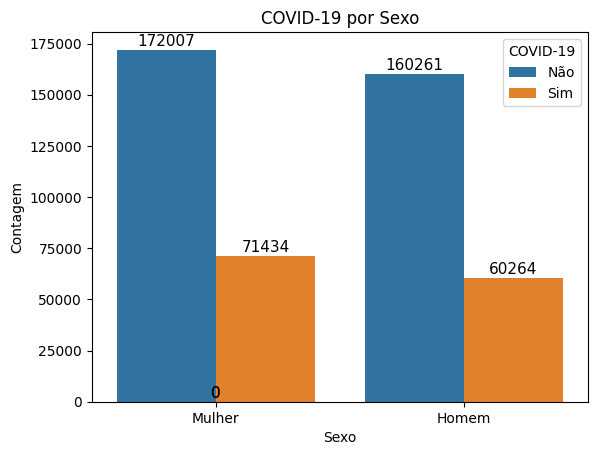

In [42]:
    # Distribuição da Covid por sexo
    ax = sns.countplot(data=df, x='sexo', hue='teve_covid')
    
   
    plt.title('COVID-19 por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Contagem')
    
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'baseline', 
                    fontsize=11, color='black', xytext=(0, 3), 
                    textcoords='offset points')
    
  
    plt.legend(title='COVID-19', loc='upper right')
    
   
    plt.show()



# Explicação do Gráfico: COVID-19 por Sexo

Este gráfico de barras apresenta a distribuição de casos de COVID-19 entre homens e mulheres, separando os dados em duas categorias: pessoas que **não tiveram COVID-19** (em azul) e aquelas que **tiveram COVID-19** (em laranja).

### Resultados:

1. **Homens**:
   - **160.261** homens **não tiveram** COVID-19.
   - **60.264** homens **tiveram** COVID-19.

2. **Mulheres**:
   - **172.007** mulheres **não tiveram** COVID-19.
   - **71.434** mulheres **tiveram** COVID-19.

### Conclusões:
- A maioria das pessoas em ambos os sexos **não tiveram** COVID-19, com uma proporção maior de homens não infectados em relação às mulheres.
- A diferença entre os sexos é pequena tanto para os que **não tiveram** quanto para os que **tiveram** a doença:
  - A contagem de **homens infectados** é levemente superior à de mulheres infectadas.
  - Para os que **não foram infectados**, a contagem de homens também é um pouco maior.

Este gráfico mostra que a distribuição da infecção por COVID-19 é semelhante entre homens e mulheres, sem uma grande discrepância entre os grupos.


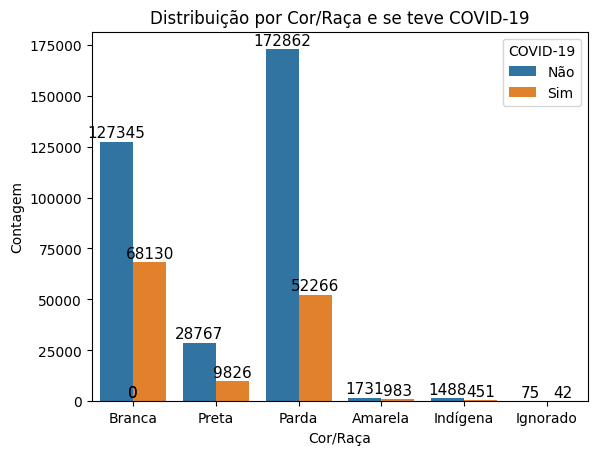

In [55]:
    #Distribuição Covid por Cor/raça
    ax = sns.countplot(data=df, x='cor_raca', hue='teve_covid')

    plt.title('Distribuição por Cor/Raça e se teve COVID-19')
    plt.xlabel('Cor/Raça')
    plt.ylabel('Contagem')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=11, color='black', xytext=(0, 3), 
                    textcoords='offset points')

    plt.legend(title='COVID-19', loc='upper right')

    plt.show()


C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\2066415614.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\2066415614.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


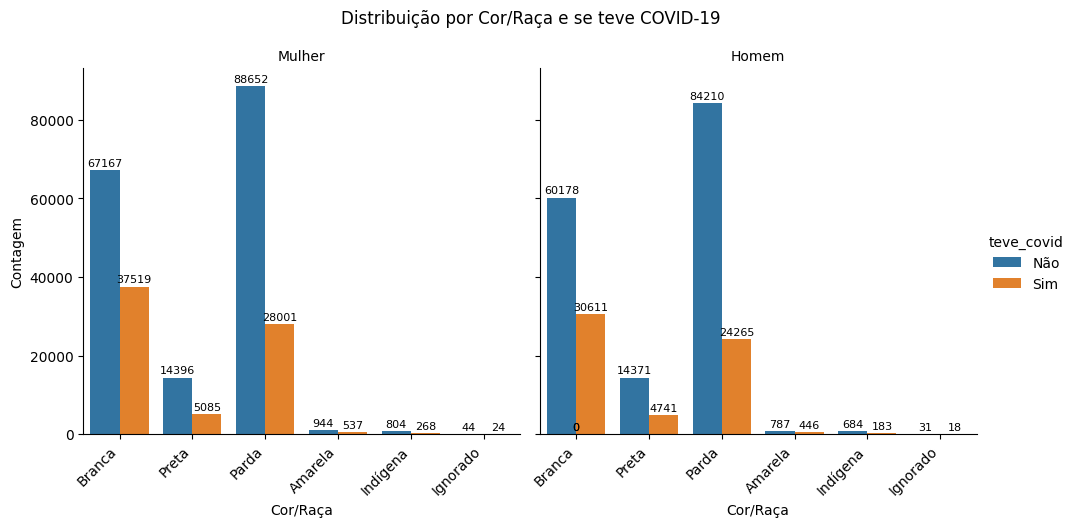

In [56]:
# Criando o gráfico(cor_raca x teve_covid, separado por sexo)
g = sns.catplot(data=df, x='cor_raca', hue='teve_covid', col='sexo', kind='count', height=5, aspect=1)


g.set_titles(col_template="{col_name}")
g.set_axis_labels("Cor/Raça", "Contagem")
g.fig.suptitle('Distribuição por Cor/Raça e se teve COVID-19', y=1.05)


for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=8, color='black', xytext=(0, 3), 
                    textcoords='offset points')

# Ajuste de layout
plt.subplots_adjust(bottom=0.2)
plt.show()


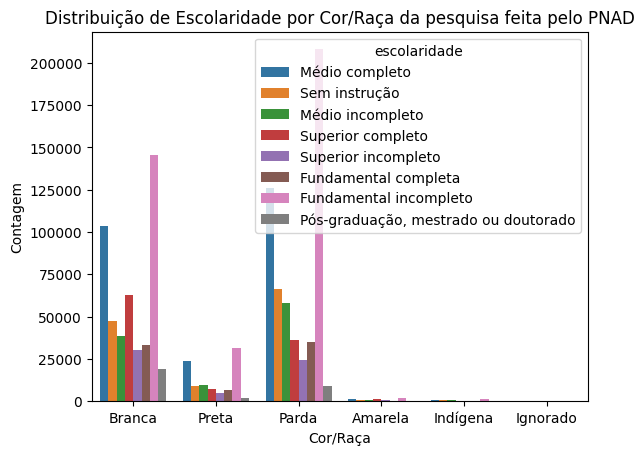

In [44]:
# Gráfico de barras para visualizar a distribuição de cor/raça por escolaridade da amostra do PNAD
sns.countplot(data=df, x='cor_raca', hue='escolaridade')
plt.title('Distribuição de Escolaridade por Cor/Raça da pesquisa feita pelo PNAD')
plt.xlabel('Cor/Raça')
plt.ylabel('Contagem')
plt.show()

C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\2632970400.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Diminuído para 8
C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\2632970400.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Diminuído para 8


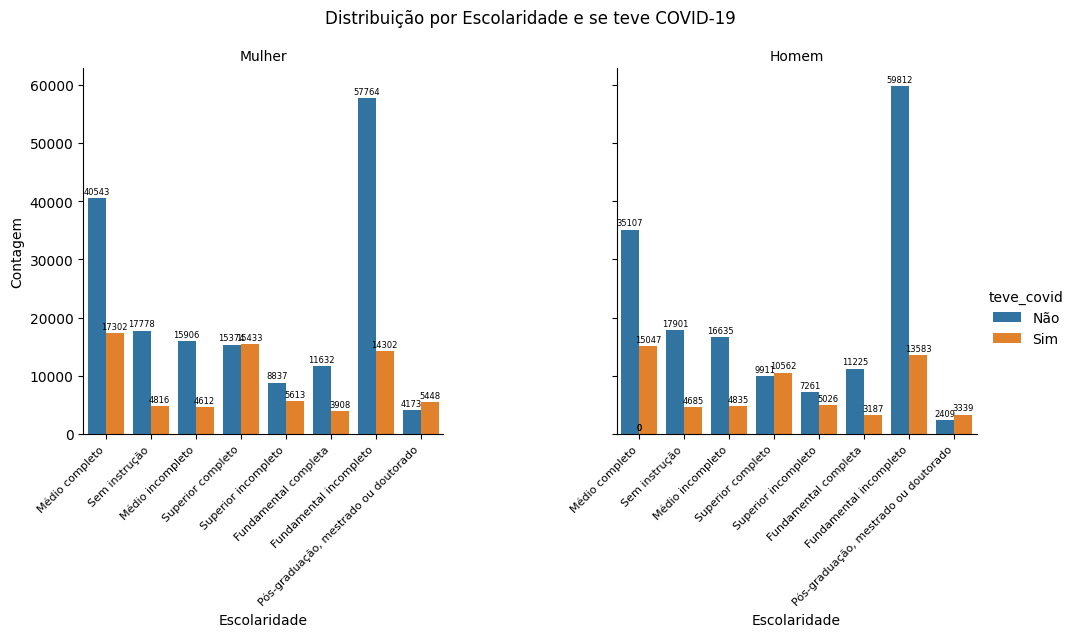

In [58]:

# Criando o gráfico de contagem com múltiplas colunas (escolaridade x teve_covid, separado por sexo)
g = sns.catplot(data=df, x='escolaridade', hue='teve_covid', col='sexo', kind='count', height=5, aspect=1)


g.set_titles(col_template="{col_name}")
g.set_axis_labels("Escolaridade", "Contagem")
g.fig.suptitle('Distribuição por Escolaridade e se teve COVID-19', y=1.05)


for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=6, color='black', xytext=(0, 3), 
                    textcoords='offset points')

# Ajuste de layout
plt.subplots_adjust(bottom=0.2)
plt.show()



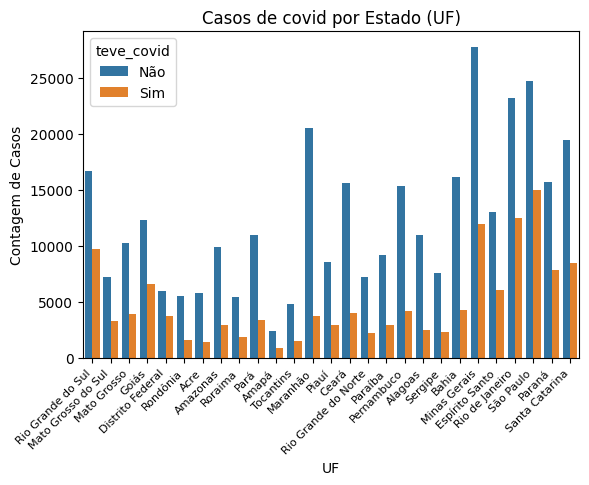

<Figure size 3000x1200 with 0 Axes>

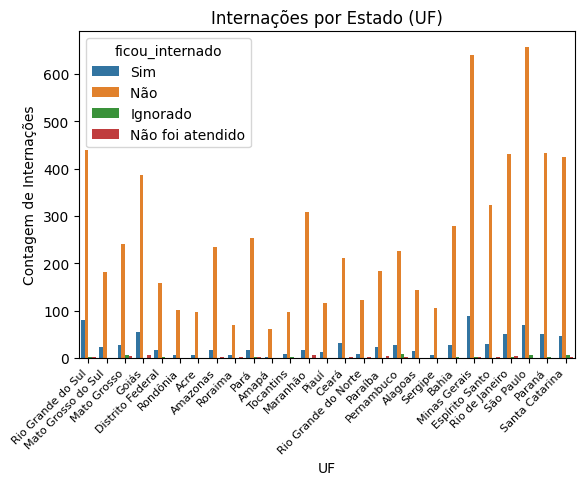

<Figure size 3000x1200 with 0 Axes>

In [46]:
# Gráfico para visualizar Casos de Covid por estado
sns.countplot(data=df, x='uf', hue='teve_covid')
plt.title('Casos de covid por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Contagem de Casos')

plt.xticks(fontsize=8)
plt.xticks(rotation=45, ha='right') 
plt.subplots_adjust(bottom=0.2)
plt.figure(figsize=(30, 12))
plt.show()


# Gráfico para visualizar internações por estado

sns.countplot(data=df, x='uf', hue='ficou_internado')
plt.title('Internações por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Contagem de Internações')

plt.xticks(fontsize=8)
plt.xticks(rotation=45, ha='right') 
plt.subplots_adjust(bottom=0.2)
plt.figure(figsize=(30, 12))
plt.show()


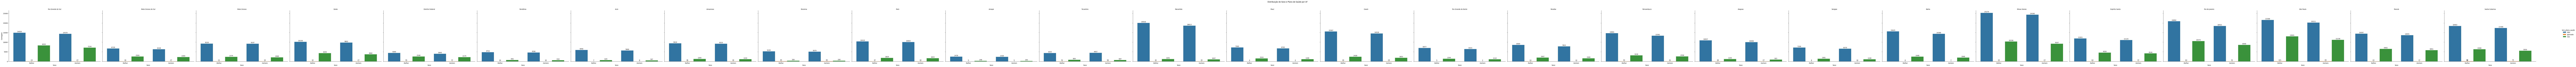

In [61]:

# Distribuição de Sexo e Plano de Saúde por UF
g = sns.catplot(data=df, x='sexo', hue='tem_plano_saude', col='uf', kind='count', height=6, aspect=1.5)  # Aumenta o tamanho da imagem

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Sexo", "Contagem")
g.fig.suptitle('Distribuição de Sexo e Plano de Saúde por UF', y=1.05)


plt.subplots_adjust(top=0.9)

# Adicionando o número de contagens sobre cada barra
for ax in g.axes.flatten(): 
    for p in ax.patches:  
        ax.annotate(f'{int(p.get_height())}',  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')  

# Exibe os gráficos
plt.show()


C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\3757681428.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
C:\Users\Conta\AppData\Local\Temp\ipykernel_9612\3757681428.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


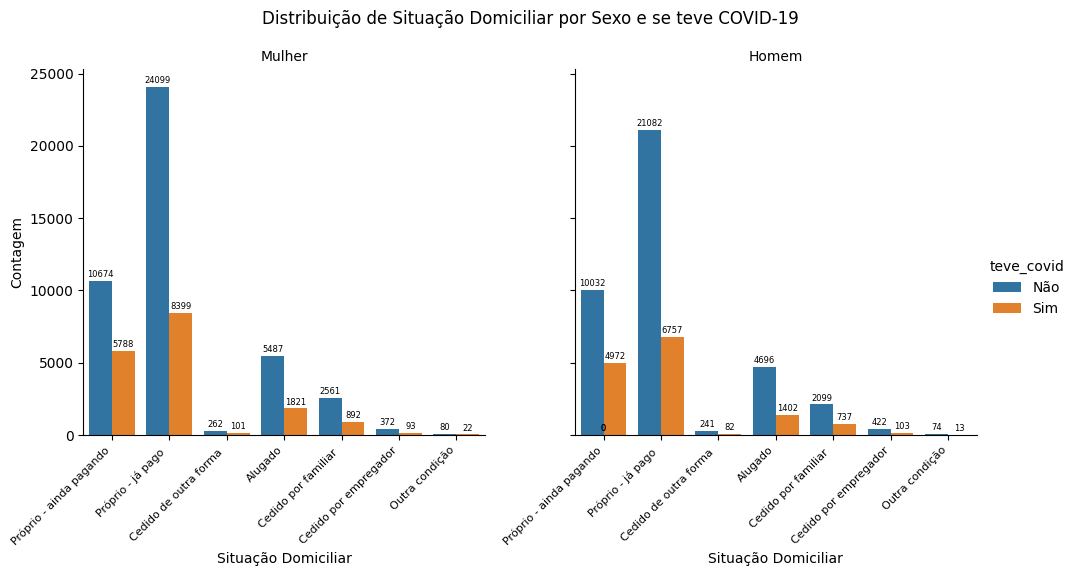

In [63]:
#Sexo por Situação Domiciliar e Teve COVID-19:

g = sns.catplot(data=df, x='situacao_domicilio', hue='teve_covid', col='sexo', kind='count', height=5, aspect=1)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Situação Domiciliar", "Contagem")
g.fig.suptitle('Distribuição de Situação Domiciliar por Sexo e se teve COVID-19', y=1.05)

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=6, color='black', xytext=(0, 3), 
                    textcoords='offset points')

# Ajuste de layout
plt.subplots_adjust(bottom=0.2)
plt.show()


In [72]:
#Ano de nascimento x Covid    
ax = sns.countplot(data=df, x='sexo', hue='teve_covid')
    
   
    plt.title('COVID-19 por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel('Contagem')
    
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'baseline', 
                    fontsize=11, color='black', xytext=(0, 3), 
                    textcoords='offset points')
    
  
    plt.legend(title='COVID-19', loc='upper right')
    
   
    plt.show()

IndentationError: unexpected indent (4005188853.py, line 3)